# INTRODUCTION TO THIS NOTEBOOK
The Global Hunger Index is the subject of this notebook.

What is the Global Hunger Index?

The Global Hunger Index is a tool that measures and tracks hunger nationally, regionally and globally. The report is prepared by Concern Worldwide and the European NGO and our Alliance2015 partner Welthungerhilfe.

Scores are calculated and assigned to countries around the world to assess progress and setbacks in combating hunger worldwide, and to give a picture of hunger across different regions and the world.

According to GHI website the index is "designed to raise awareness and understanding of the fight against hunger, provide a way to compare levels of hunger between countries and regions, and to draw attention to those regions of the world where hunger levels are highest and where the need for additional efforts to eliminate hunger is greatest"

Reference:"What is the Global Hunger Index" by( https://www.concern.net/what-global-hunger-index )

# OBJECTIVE 
I've used the Global Hunger Index dataset to focus on Asian nations and figure out which has the highest index value and I also want to analyze those nations GDPs and how they relate to the hunger index.

# ABOUT THE DATASETS
I have used three data sets here:

1.Global hunger index collected from kaggle

reference: https://www.kaggle.com/datasets/whenamancodes/the-global-hunger-index?select=global-hunger-index.csv)
 
2.Asian countries

reference: https://www.worldometers.info/geography/how-many-countries-in-asia/

3.GDP of asian countries from internet.

# VARIABLES OF INTEREST
The variables i will be mostly considering are:
- Entity and Index - which represents countries and Global Hunger Index from GHI dataset
- Country from asian countries dataset
- Country and Year 2021 from GDP dataset

# IMPORTING THE DATASETS

In [1]:
#Importing datasets through libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_hi=pd.read_csv('./global-hunger-index.csv')
df_asian= pd.read_html('https://www.worldometers.info/geography/how-many-countries-in-asia/')
gdp = pd.read_excel('./Asian_GDP.xlsx')

In [3]:
#renaming the column from "Global Hunger Index" to "Index"
data_hi.rename(columns={'Global Hunger Index (2021)':'Index'}, inplace = True)
data_hi

,Entity,Code,Year,Index,411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN
...,...,...,...,...,...
466,Yemen,YEM,2006,38.8,NaN
467,Yemen,YEM,2012,38.4,NaN
468,Yemen,YEM,2021,45.1,NaN
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...


In [4]:
# Importing list of Asian countries from html mentioned above
data = df_asian[0]
data

,#,Country,Population(2020),Subregion
0,1,China,1439323776,Eastern Asia
1,2,India,1380004385,Southern Asia
2,3,Indonesia,273523615,South-Eastern Asia
3,4,Pakistan,220892340,Southern Asia
4,5,Bangladesh,164689383,Southern Asia
5,6,Japan,126476461,Eastern Asia
6,7,Philippines,109581078,South-Eastern Asia
7,8,Vietnam,97338579,South-Eastern Asia
8,9,Turkey,84339067,Western Asia
9,10,Iran,83992949,Southern Asia


In [5]:
# Merging both the Hunger index data and Asian countries list by left join and creating a new dataframe
h_asian=pd.merge(data,data_hi,how='inner',left_on='Country', right_on='Entity')

In [6]:
# Dropping columnns country, population,subregion, annotations
h_asian.drop(['Country','Population(2020)','Subregion','411773-annotations'], axis=1, inplace=True)

In [7]:
h_asian

,#,Entity,Code,Year,Index
0,1,China,CHN,2000,13.3
1,1,China,CHN,2006,9.0
2,1,China,CHN,2012,2.5
3,1,China,CHN,2021,2.5
4,2,India,IND,2000,38.8
...,...,...,...,...,...
129,40,Mongolia,MNG,2021,6.1
130,41,Armenia,ARM,2000,19.3
131,41,Armenia,ARM,2006,13.3
132,41,Armenia,ARM,2012,10.4


# SEVERITY SCORE
Based on the indicator's maximum observed level on a global scale in recent decades, each indicator is assigned a standardised score on a scale of 100 points. The GHI score for each nation is then determined by averaging the scores.

Along a severity scale, these scores position a country:

>Low = less than or equal to 9.9 Moderate = 10.0 - 19.9

>Serious = 20.0 - 34.9

>Alarming = 35.0 - 49.9

>Extremely alarming = less than or equal to 50.0

Therefore, a country will be classified as having serious, worrying, or extremely alarming levels of hunger if it receives high scores across all the indicators, whereas a lower aggregate score will classify the same country as having low or moderate levels of hunger.

Defining a function to categorise the countries according to the severity scale mentioned above

In [8]:
def scale(Index):
    if Index <= 9.9:
        return 'Low'
    elif 10.0<=Index<=19.9:
        return 'Moderate'
    elif 20.0<=Index<=34.9:
        return 'Serious'
    elif 35.0<=Index<=49.9:
        return 'Alarming'
    else:
        return 'Extremely alarming'

h_asian['score'] = h_asian['Index'].apply(scale)       

In [9]:
h_asian

,#,Entity,Code,Year,Index,score
0,1,China,CHN,2000,13.3,Moderate
1,1,China,CHN,2006,9.0,Low
2,1,China,CHN,2012,2.5,Low
3,1,China,CHN,2021,2.5,Low
4,2,India,IND,2000,38.8,Alarming
...,...,...,...,...,...,...
129,40,Mongolia,MNG,2021,6.1,Low
130,41,Armenia,ARM,2000,19.3,Moderate
131,41,Armenia,ARM,2006,13.3,Moderate
132,41,Armenia,ARM,2012,10.4,Moderate


In [10]:
# Calculating the total count of countries by the score

In [11]:
h_grp=h_asian.groupby('score')['score'].count()

In [12]:
h_grp

score
Alarming              14
Extremely alarming     1
Low                   31
Moderate              47
Serious               41
Name: score, dtype: int64

# VISUALISING THE SEVERITY 
A pie diagram based on the score distribution of severity in percentages is displayed.

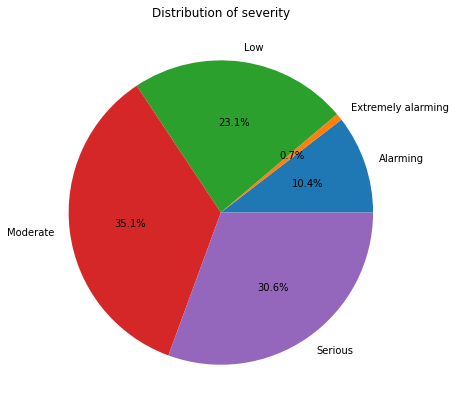

In [13]:
fig = plt.figure(figsize =(10, 7))
plt.pie(h_grp, labels = h_grp.index, autopct='%1.1f%%')
plt.title("Distribution of severity")
plt.show()

According to the pie chart, the majority of nations are in the moderate severity, which accounts for around 35.1% of total contributions, followed by severe nations with 30.6%. Low and Alarming countries each provide 23.1% and 10.4%, whereas severely alarming countries make up the smallest portion of contributions at 0.7%.

# FILTERING ONLY SERIOUS COUNTRIES

In [14]:
#Setting a variable for serious nations and filtering them by all years

In [15]:
serious_yr= h_asian.loc[ (h_asian['score']== 'Serious')]

In [16]:
serious_yr

,#,Entity,Code,Year,Index,score
6,2,India,IND,2012,28.8,Serious
7,2,India,IND,2021,27.5,Serious
8,3,Indonesia,IDN,2000,26.1,Serious
9,3,Indonesia,IDN,2006,29.5,Serious
10,3,Indonesia,IDN,2012,23.0,Serious
13,4,Pakistan,PAK,2006,33.1,Serious
14,4,Pakistan,PAK,2012,32.1,Serious
15,4,Pakistan,PAK,2021,24.7,Serious
16,5,Bangladesh,BGD,2000,34.0,Serious
17,5,Bangladesh,BGD,2006,28.9,Serious


# PIVOT 
In this step I want to pivot data so that we have one row per country, and a column for each year.
Also Im calculating the mean values for all 4 years and adding it in a new column named mean_value.
Summarizing pivot table with top 10 countries into a variable called top_year


In [17]:
allyr=h_asian.pivot_table(index='Entity', columns='Year', values='Index',fill_value=0)
allyr=allyr.reset_index()
allyr['mean_val']=allyr.mean(axis = 1, skipna = True)
allyr_sorted = allyr.sort_values(by=['mean_val'],ascending=False)

In [18]:
top_year = allyr_sorted.nlargest(10, 'mean_val', keep='first')
top_year

Year,Entity,2000,2006,2012,2021,mean_val
34,Yemen,41.0,38.8,38.4,45.1,40.825
0,Afghanistan,50.9,42.7,34.3,28.3,39.050
7,India,38.8,37.4,28.8,27.5,33.125
21,North Korea,39.5,33.1,29.1,25.2,31.725
23,Pakistan,36.7,33.1,32.1,24.7,31.650
15,Laos,44.1,31.9,25.7,19.5,30.300
19,Myanmar,39.8,31.6,22.9,17.5,27.950
3,Bangladesh,34.0,28.9,28.6,19.1,27.650
20,Nepal,37.4,30.9,23.1,19.1,27.625
4,Cambodia,41.1,27.1,24.2,17.0,27.350


# MELTING THE DATA AND VISUALISING 
Unvipovtting the data so that it contains columns with country and index value for that year.
And then visualising the trends from top 10 countries.

In [19]:
df_unpivot = pd.melt(top_year, id_vars='Entity', value_vars=[2000, 2006, 2012,2021])
df_unpivot

,Entity,Year,value
0,Yemen,2000,41.0
1,Afghanistan,2000,50.9
2,India,2000,38.8
3,North Korea,2000,39.5
4,Pakistan,2000,36.7
5,Laos,2000,44.1
6,Myanmar,2000,39.8
7,Bangladesh,2000,34.0
8,Nepal,2000,37.4
9,Cambodia,2000,41.1


In [20]:
# Importing and visualising the trends of top 10 countries

In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Hunger Index Trends of Top 10 Asian countries ')

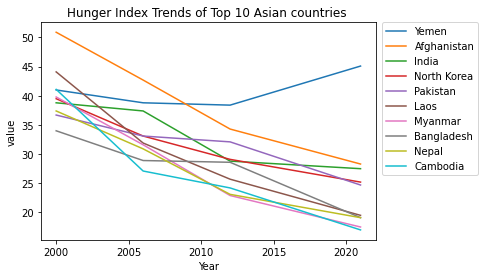

In [22]:
sns.lineplot(data=df_unpivot, x="Year", y="value", hue="Entity")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.title("Hunger Index Trends of Top 10 Asian countries ")

According to this line plot, Afghanistan had the highest score in 2000 and had a progressive decline from 2012 to 2021.
Yemen, on the other hand, had an average index value of 40 from 2000 to 2013, but that number unexpectedly rose to 45 by 2020.
The rest of the world follows a similar pattern, with an average index between 35 and 40 that has been steadily declining over time.

# GDP DATA 

 Filtering the GDP data only for the year 2021.

In [23]:
gdp_ = gdp[['Country','2021']]
gdp_

,Country,2021
0,Pakistan,292.217
1,Lebanon,21.222
2,Afghanistan,21.222
3,Armenia,13.612
4,Azerbaijan,52.645
5,Bahrain,39.104
6,Bangladesh,355.689
7,Bhutan,2.480
8,Brunei Darussalam,15.686
9,Cambodia,26.080


In the next step Im filtering the data of top 10 countries by the year 2021 and storing in new data frame called df_2021.

In [24]:
df_2021 = df_unpivot[df_unpivot['Year']==2021]

In [25]:
df_2021

,Entity,Year,value
30,Yemen,2021,45.1
31,Afghanistan,2021,28.3
32,India,2021,27.5
33,North Korea,2021,25.2
34,Pakistan,2021,24.7
35,Laos,2021,19.5
36,Myanmar,2021,17.5
37,Bangladesh,2021,19.1
38,Nepal,2021,19.1
39,Cambodia,2021,17.0


# MERGING AND PLOTTING WHAT I SEE

Combining the data of the top 10 nations and the GDP in 2021.
For better display and analysis, remove any columns with null values and only take into account nations with GDPs under 500.

In [26]:
df_mrg = pd.merge(df_2021,gdp_,how='left',left_on='Entity', right_on='Country')
df_mrg.dropna()
cond = df_mrg[df_mrg['2021'] <= 500]
cond

,Entity,Year,value,Country,2021
0,Yemen,2021,45.1,Yemen,19.471
1,Afghanistan,2021,28.3,Afghanistan,21.222
4,Pakistan,2021,24.7,Pakistan,292.217
6,Myanmar,2021,17.5,Myanmar,66.740
7,Bangladesh,2021,19.1,Bangladesh,355.689
8,Nepal,2021,19.1,Nepal,34.265
9,Cambodia,2021,17.0,Cambodia,26.080


Text(0.5, 1.0, 'GDP and Hunger Index')

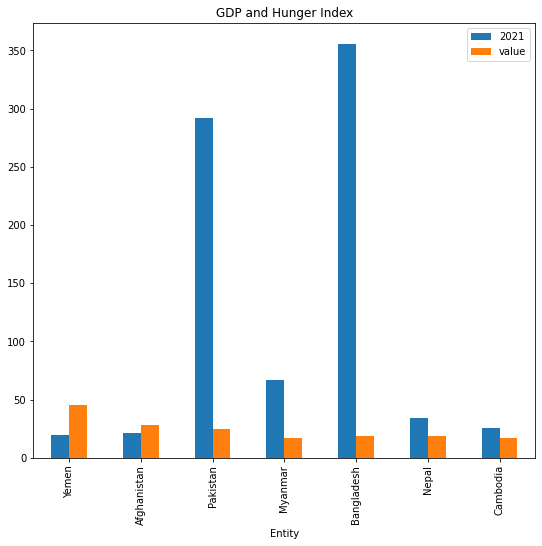

In [27]:
cond.plot(x='Entity',y=['2021','value'],kind='bar',figsize=(9,8))
plt.title("GDP and Hunger Index")

Yemen and Afghanistan have low GDPs and high hunger indices, according to the above illustration.
Despite having high GDP figures, countries like Pakistan, Myanmar, and Bangladesh nonetheless have high hunger indices.

# CONCLUSION 

Things to conclude from this study:

- Even with a lot of measures towards malnutrition majority of asian countries still fall under the serious level of severity with 30.6%.
- In the blog '2021 Global Hunger Index: Three Cs are starving the world' by BY CESVI (https://www.cesvi.eu/news/2021-global-hunger-index-three-cs-are-starving-the-world/), we can find some tips.
- Armed conflicts, the pandemic and climate change threaten to pulverise the slow progress made in the past years towards the “Zero Hunger” Goal set for the year 2030 by the United Nations. After years of decline, in 2020 the percentage of malnourished people in the world is on the rise: 155 million people are in a state of acute food insecurity, 20 million more than in 2019. The fight against global hunger faces a heavy setback. According to the 2021 Global Hunger Index, in 47 countries hunger remains exceptionally high and with little chance to reduce it to lower levels by the end of the decade.

- Armed wars, which would ultimately lower a country's GDP, are contributing to the Hunger index, even though the data is insufficient.
Although the impact of GDP on the Hunger Index is not yet entirely apparent, it undoubtedly plays a significant role in reducing hunger to some extent as it is one of many elements that contribute to the global hunger epidemic.

Nevertheless, today it already appears evident that food security has been endangered by the economic shock that went with the global health crisis. 